#### **Phase 3: Exploratory Data Analysis (EDA)**
**Goal:** Extract business insights from the 2018 Moroccan E-Commerce dataset. 

We will focus on four key areas:
1. **Geographic Performance:** Which regions and cities drive the most revenue?
2. **Product Analysis:** Which categories are the most profitable?
3. **Payment Behavior:** How do Moroccans prefer to pay?
4. **Time Series:** Are there specific months with sales spikes?

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load our Master Dataset
df = pd.read_csv('data/Morocco_Ecommerce_Master.csv')

# Ensure Order Date is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

print("Setup complete. Data loaded.")

Setup complete. Data loaded.


#### **1. Geographic Insights**
We want to see which Moroccan regions are performing the best. This helps in optimizing logistics and marketing spend.

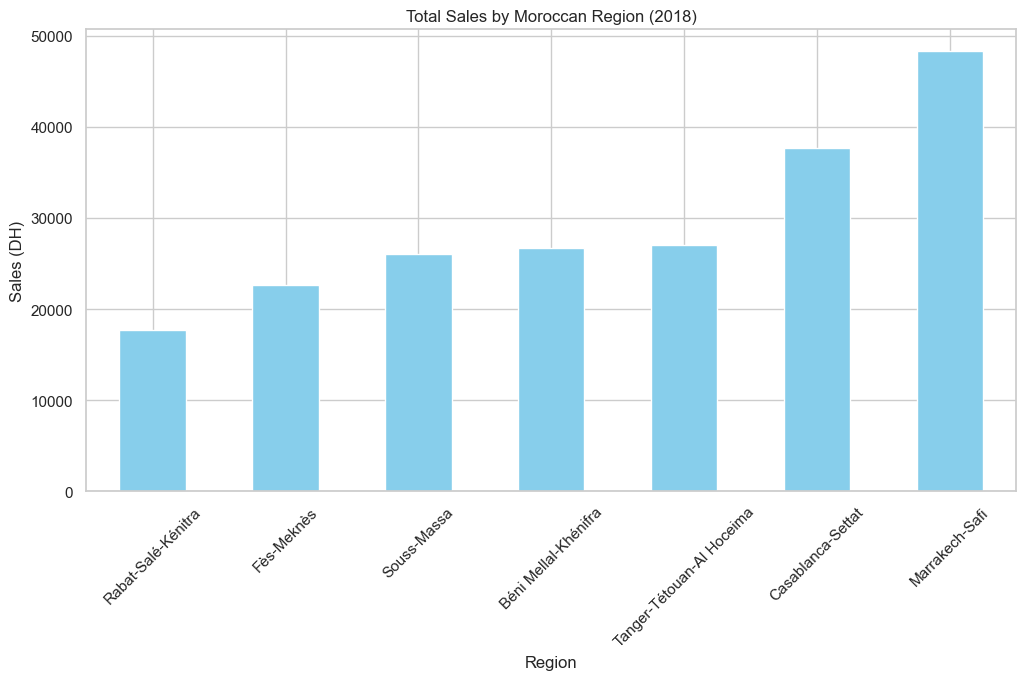

,Total Sales,Profit
State,,
Rabat-Salé-Kénitra,17656,2382
Fès-Meknès,22636,3058
Souss-Massa,26085,2118
Béni Mellal-Khénifra,26671,2193
Tanger-Tétouan-Al Hoceima,26978,3747
Casablanca-Settat,37666,3457
Marrakech-Safi,48250,1561


In [27]:
# Grouping by State (Region) and calculating total sales and profit
region_stats = df.groupby('State')[['Total Sales', 'Profit']].sum().sort_values(by='Total Sales', ascending=True)

# Visualizing Sales by Region
region_stats['Total Sales'].plot(kind='bar', color='skyblue')
plt.title('Total Sales by Moroccan Region (2018)')
plt.ylabel('Sales (DH)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

# Displaying the table for exact numbers
region_stats

#### -**By city**
We want to see which Moroccan cities are performing the worst and best. This helps in optimizing logistics and marketing spend.

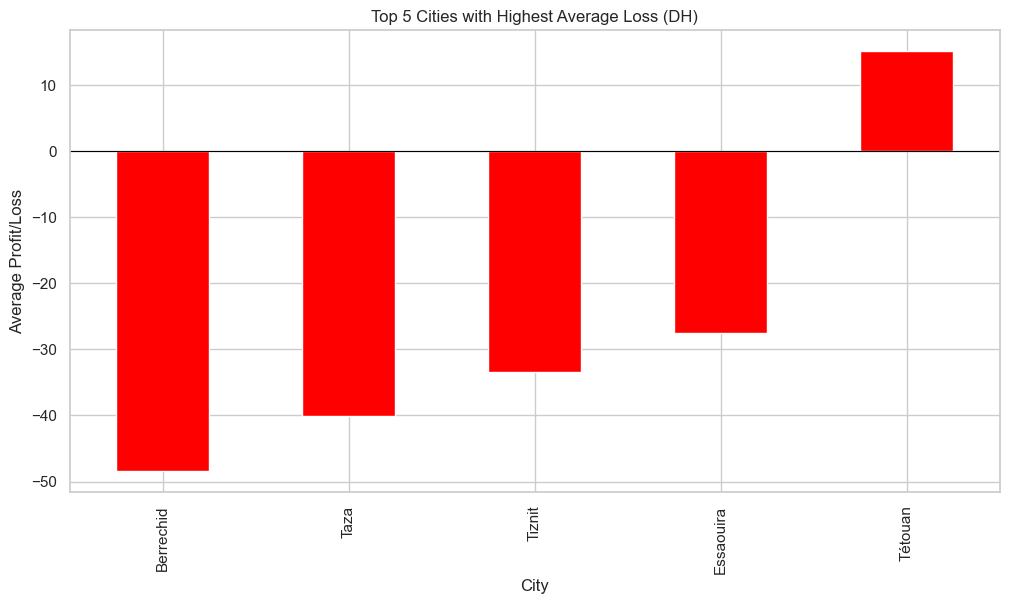

In [28]:
# 1. Grouping by City to find the average profit per transaction
city_analysis = df.groupby('City')['Profit'].mean().sort_values()

# 2. Visualizing the bottom 5 cities (The biggest losses)
city_analysis.head(5).plot(kind='bar', color='red')
plt.title('Top 5 Cities with Highest Average Loss (DH)')
plt.ylabel('Average Profit/Loss')
plt.axhline(0, color='black', linewidth=0.8) # Adding a baseline
plt.show()

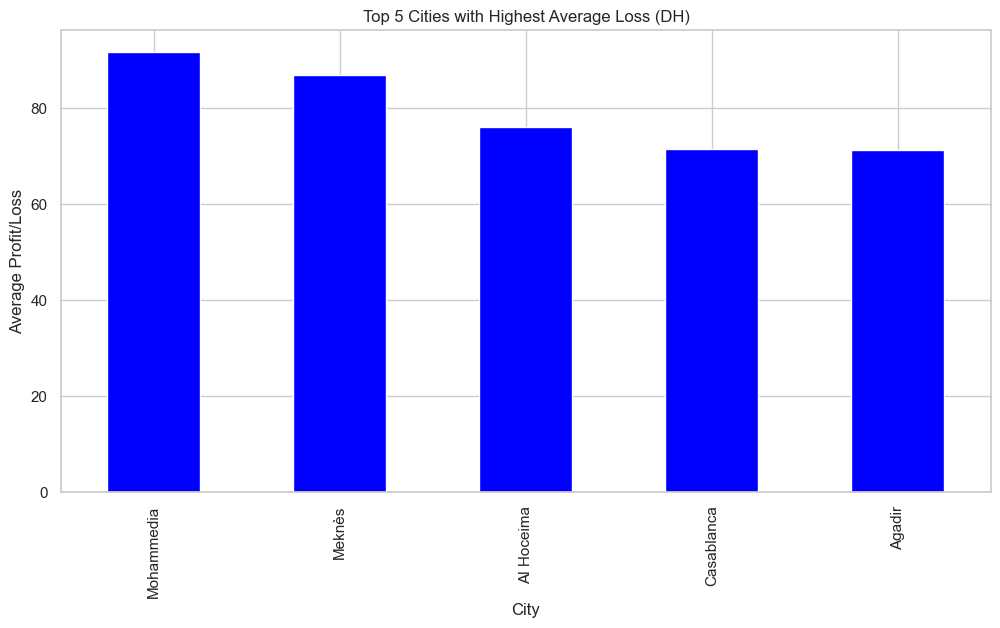

In [29]:
# 1. Grouping by City to find the average profit per transaction
city_analysis = df.groupby('City')['Profit'].mean().sort_values(ascending=False)

# 2. Visualizing the bottom 5 cities (The biggest losses)
city_analysis.head(5).plot(kind='bar', color='blue')
plt.title('Top 5 Cities with Highest Average Loss (DH)')
plt.ylabel('Average Profit/Loss')
plt.axhline(0, color='black', linewidth=0.8) # Adding a baseline
plt.show()

#### **Phase 4: Payment Dynamics**
**Hypothesis:** Customers who use "Paiement en plusieurs fois" (Installments) have a significantly higher "Total Sales" value than those paying with Cash.

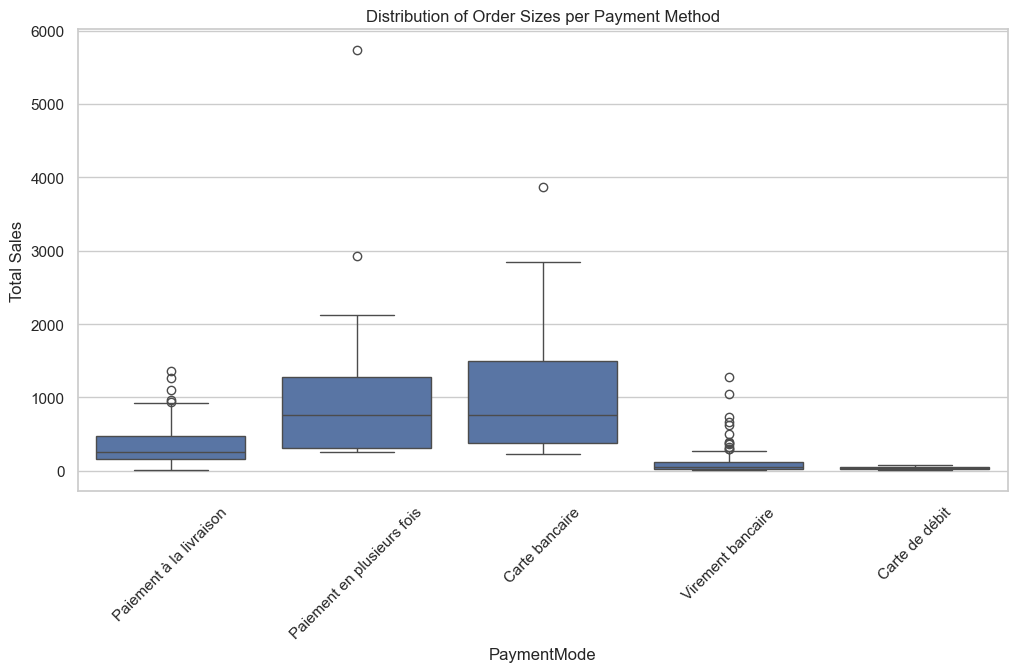

In [32]:
# 1. Comparing average order size by payment method
payment_behavior = df.groupby('PaymentMode')['Total Sales'].mean().sort_values(ascending=False)

# 2. Creating a Boxplot to see the distribution and outliers
import seaborn as sns
sns.boxplot(x='PaymentMode', y='Total Sales', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Order Sizes per Payment Method')
plt.show()

#### **Phase 5: Feature Engineering**
**Goal:** Transform the raw data into a format that a Machine Learning model can understand (Numerical & Binary).

In [33]:
# 1. Create the Target variable (Binary)
df['Target'] = (df['Profit'] > 0).astype(int)

# 2. One-Hot Encoding for categorical variables
features = ['Category', 'PaymentMode', 'State']
df_ml = pd.get_dummies(df, columns=features, drop_first=True)

# 3. Drop columns that the model can't use (Names, IDs, Dates)
df_ml = df_ml.drop(['Order ID', 'Order Date', 'CustomerName', 'City'], axis=1)

df_ml.head()

,Total Sales,Profit,Quantity,Sub-Category,Month,Year,Is_Profitable,Target,Category_Electronics,Category_Furniture,PaymentMode_Carte de débit,PaymentMode_Paiement en plusieurs fois,PaymentMode_Paiement à la livraison,PaymentMode_Virement bancaire,State_Casablanca-Settat,State_Fès-Meknès,State_Marrakech-Safi,State_Rabat-Salé-Kénitra,State_Souss-Massa,State_Tanger-Tétouan-Al Hoceima
0,1096,658,7,Electronic Games,March,2018,True,1,True,False,False,False,True,False,False,False,False,True,False,False
1,5729,64,14,Chairs,February,2018,True,1,False,True,False,True,False,False,False,False,True,False,False,False
2,2927,146,8,Bookcases,January,2018,True,1,False,True,False,True,False,False,True,False,False,False,False,False
3,2847,712,8,Printers,December,2018,True,1,True,False,False,False,False,False,False,False,False,False,False,False
4,2617,1151,4,Phones,August,2018,True,1,True,False,False,False,False,False,True,False,False,False,False,False
